# [MLflow](https://mlflow.org/)  

[MLflow](https://mlflow.org/docs/latest/concepts.html) seeks to address these three core issues:

* It’s difficult to keep track of experiments
* It’s difficult to reproduce code
* There’s no standard way to package and deploy models

In the past, when examining a problem, you would have to manually keep track of the many models you created, as well as their associated parameters and metrics. This can quickly become tedious and take up valuable time, which is where MLflow comes in.

MLflow is pre-installed on the Databricks Runtime for ML.

## ![Spark Logo Tiny](https://files.training.databricks.com/images/105/logo_spark_tiny.png) In this lesson you:<br>
* Use MLflow to track experiments, log metrics, and compare runs

<div><img src="https://files.training.databricks.com/images/eLearning/ML-Part-4/mlflow-tracking.png" style="height: 400px; margin: 20px"/></div>

We will check the difference on turning on and off MLFlow Autotrack

In [0]:
import os
#import mlflow
#mlflow.autolog(disable=True)

### Setting the default database and user name  
##### Substitute "renato" by your name in the `username` variable.

In [0]:
## Put your name here
username = "renato"

dbutils.widgets.text("username", username)
spark.sql(f"CREATE DATABASE IF NOT EXISTS dsacademy_embedded_wave3_{username}")
spark.sql(f"USE dsacademy_embedded_wave3_{username}")
spark.conf.set("spark.sql.shuffle.partitions", 40)

spark.sql("SET spark.databricks.delta.formatCheck.enabled = false")
spark.sql("SET spark.databricks.delta.properties.defaults.autoOptimize.optimizeWrite = true")

Out[4]: DataFrame[key: string, value: string]

### Reading Dataset

Let's start by loading in our SF Airbnb Dataset.

(if not found, re-run notebook 3 from Module B, day 3)

In [0]:
deltaPath = os.path.join("/", "tmp", username)    #If we were writing to the root folder and not to the DBFS
if not os.path.exists(deltaPath):
    os.mkdir(deltaPath)
    
print(deltaPath)

airbnbDF = spark.read.format("delta").load(deltaPath)
airbnbDF.display(10)

/tmp/renato


host_is_superhost,instant_bookable,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,bedrooms_na,beds_na,review_scores_rating_na,review_scores_accuracy_na,review_scores_cleanliness_na,review_scores_checkin_na,review_scores_communication_na,review_scores_location_na,review_scores_value_na
f,f,6.0,Donaustadt,48.24262,16.42767,Room in bed and breakfast,Hotel room,3.0,1.0,2.0,1.0,14.0,4.71,4.86,4.93,4.93,4.86,4.71,4.5,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t,t,3.0,Leopoldstadt,48.21924,16.37831,Entire rental unit,Entire home/apt,5.0,1.0,3.0,5.0,350.0,4.75,4.8,4.65,4.91,4.93,4.75,4.69,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t,t,19.0,Rudolfsheim-Fnfhaus,48.18434,16.32701,Entire rental unit,Entire home/apt,6.0,2.0,4.0,1.0,181.0,4.83,4.9,4.88,4.89,4.93,4.59,4.7,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,f,6.0,Innere Stadt,48.21496,16.37161,Entire rental unit,Entire home/apt,2.0,1.0,1.0,2.0,100.0,4.64,4.73,4.55,4.8,4.91,4.89,4.59,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t,f,3.0,Leopoldstadt,48.21778,16.37847,Entire rental unit,Entire home/apt,3.0,1.0,2.0,5.0,347.0,4.65,4.77,4.51,4.93,4.95,4.86,4.58,68.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,f,6.0,Innere Stadt,48.21351,16.37282,Entire rental unit,Entire home/apt,2.0,1.0,1.0,3.0,52.0,4.63,4.67,4.35,4.69,4.75,4.88,4.56,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t,f,4.0,Leopoldstadt,48.2176,16.38018,Private room in rental unit,Private room,2.0,1.0,2.0,2.0,117.0,4.77,4.74,4.68,4.8,4.75,4.81,4.71,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,f,6.0,Innere Stadt,48.21318,16.37486,Entire rental unit,Entire home/apt,4.0,2.0,1.0,3.0,69.0,4.58,4.8,4.76,4.83,4.92,4.85,4.73,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
f,t,1.0,Ottakring,48.22207,16.31594,Entire rental unit,Entire home/apt,4.0,2.0,2.0,3.0,50.0,4.87,4.94,4.71,4.94,4.96,4.4,4.73,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
t,f,2.0,Favoriten,48.17437,16.39339,Entire condo,Entire home/apt,4.0,1.0,2.0,5.0,178.0,4.77,4.87,4.67,4.88,4.87,3.98,4.66,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
(trainDF, testDF) = airbnbDF.randomSplit([.8, .2], seed=42)
print(trainDF.cache().count())

9504


### MLflow Tracking

MLflow Tracking is a logging API specific for machine learning and agnostic to libraries and environments that do the training.  It is organized around the concept of **runs**, which are executions of data science code.  Runs are aggregated into **experiments** where many runs can be a part of a given experiment and an MLflow server can host many experiments.

You can use [mlflow.set_experiment()](https://mlflow.org/docs/latest/python_api/mlflow.html#mlflow.set_experiment) to set an experiment, but if you do not specify an experiment, it will automatically be scoped to this notebook.

### Track Runs

Each run can record the following information:<br><br>

- **Parameters:** Key-value pairs of input parameters such as the number of trees in a random forest model
- **Metrics:** Evaluation metrics such as RMSE or Area Under the ROC Curve
- **Artifacts:** Arbitrary output files in any format.  This can include images, pickled models, and data files
- **Source:** The code that originally ran the experiment

**NOTE**: For Spark models, MLflow can only log PipelineModels.

In [0]:
import mlflow
import mlflow.spark
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

with mlflow.start_run(run_name="LR-Single-Feature") as run:
    # Define pipeline
    vecAssembler = VectorAssembler(inputCols=["bedrooms"], outputCol="features")
    lr = LinearRegression(featuresCol="features", labelCol="price")
    pipeline = Pipeline(stages=[vecAssembler, lr])
    pipelineModel = pipeline.fit(trainDF)
  
    # Log parameters
    mlflow.log_param("label", "price-bedrooms")
  
    # Log model
    mlflow.spark.log_model(pipelineModel, "model")
  
    # Evaluate predictions
    predDF = pipelineModel.transform(testDF)
    regressionEvaluator = RegressionEvaluator(predictionCol="prediction", labelCol="price", metricName="rmse")
    rmse = regressionEvaluator.evaluate(predDF)
   
    # Log metrics
    mlflow.log_metric("rmse", rmse)

There, all done! Let's go through the other two linear regression models and then compare our runs. 

**Question**: Does anyone remember the RMSE of the other runs?

Next let's build our linear regression model but use all of our features.

In [0]:
from pyspark.ml.feature import RFormula
with mlflow.start_run(run_name="LR-All-Features") as run:
    # Create pipeline
    rFormula = RFormula(formula="price ~ .", featuresCol="features", labelCol="price", handleInvalid="skip")
    lr = LinearRegression(labelCol="price", featuresCol="features")
    pipeline = Pipeline(stages = [rFormula, lr])
    pipelineModel = pipeline.fit(trainDF)
  
    # Log pipeline
    mlflow.spark.log_model(pipelineModel, "model")
  
    # Log parameter
    mlflow.log_param("label", "price-all-features")
  
    # Create predictions and metrics
    predDF = pipelineModel.transform(testDF)
    regressionEvaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction")
    rmse = regressionEvaluator.setMetricName("rmse").evaluate(predDF)
    r2 = regressionEvaluator.setMetricName("r2").evaluate(predDF)
  
    # Log both metrics
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)

Finally, we will use Linear Regression to predict the log of the price, due to its log normal distribution.

We'll also practice logging artifacts to keep a visual of our log normal histogram.

<Figure size 432x288 with 0 Axes>

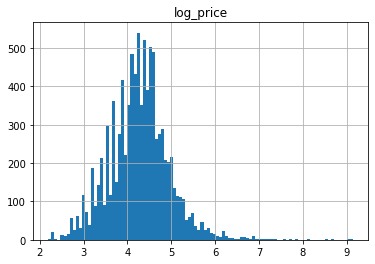

In [0]:
from pyspark.ml.feature import RFormula
from pyspark.sql.functions import col, log, exp
import matplotlib.pyplot as plt

with mlflow.start_run(run_name="LR-Log-Price") as run:
    # Take log of price
    logTrainDF = trainDF.withColumn("log_price", log(col("price")))
    logTestDF = testDF.withColumn("log_price", log(col("price")))
  
    # Log parameter
    mlflow.log_param("label", "log-price")
  
    # Create pipeline
    rFormula = RFormula(formula="log_price ~ . - price", featuresCol="features", labelCol="log_price", handleInvalid="skip")  
    lr = LinearRegression(labelCol="log_price", predictionCol="log_prediction")
    pipeline = Pipeline(stages = [rFormula, lr])
    pipelineModel = pipeline.fit(logTrainDF)
  
    # Log model
    mlflow.spark.log_model(pipelineModel, "log-model")
  
    # Make predictions
    predDF = pipelineModel.transform(logTestDF)
    expDF = predDF.withColumn("prediction", exp(col("log_prediction")))
  
    # Evaluate predictions
    rmse = regressionEvaluator.setMetricName("rmse").evaluate(expDF)
    r2 = regressionEvaluator.setMetricName("r2").evaluate(expDF)
  
    # Log metrics
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
  
    # Log artifact
    plt.clf()
    logTrainDF.toPandas().hist(column="log_price", bins=100)
    plt.savefig(deltaPath + "logNormal.png")
    mlflow.log_artifact(deltaPath)
    plt.show()

That's it! Now, let's use MLflow to easily look over our work and compare model performance. You can either query past runs programmatically or use the MLflow UI.

### Querying Past Runs

You can query past runs programmatically in order to use this data back in Python.  The pathway to doing this is an `MlflowClient` object.

In [0]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

In [0]:
dir(client)

Out[17]: ['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_registry_client',
 '_get_run_link',
 '_log_artifact_helper',
 '_record_logged_model',
 '_registry_uri',
 '_tracking_client',
 'create_experiment',
 'create_model_version',
 'create_registered_model',
 'create_run',
 'delete_experiment',
 'delete_model_version',
 'delete_model_version_tag',
 'delete_registered_model',
 'delete_registered_model_tag',
 'delete_run',
 'delete_tag',
 'download_artifacts',
 'get_experiment',
 'get_experiment_by_name',
 'get_latest_versions',
 'get_metric_history',
 'get_model_version',
 'get_model_version_download_uri',
 'get_model_version_stages',
 'get_registered_model',
 'get_

In [0]:
for c in client.list_experiments():
    print(c)

<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/1a88a63343e747acae642ca2ec4006ee', experiment_id='1a88a63343e747acae642ca2ec4006ee', lifecycle_stage='active', name='/Repos/renato.rocha-souza@rbinternational.com/Embedded_Data_Scientist/Module_D/Day1/02a_MLflow_Tracking', tags={'mlflow.experiment.sourceId': '2100321592107478',
 'mlflow.experiment.sourceName': '/Repos/renato.rocha-souza@rbinternational.com/Embedded_Data_Scientist/Module_D/Day1/02a_MLflow_Tracking',
 'mlflow.experiment.sourceType': 'REPO_NOTEBOOK',
 'mlflow.ownerEmail': 'renato.rocha-souza@rbinternational.com',
 'mlflow.ownerId': '3892373017852382'}>
<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/b0f60ffd9cd14be09e3e27172a049926', experiment_id='b0f60ffd9cd14be09e3e27172a049926', lifecycle_stage='active', name='/Repos/renato.rocha-souza@rbinternational.com/Embedded_Data_Scientist/Module_D/Day1/01_Clustering_with_Spark', tags={'mlflow.experiment.sourceId': '2100321592107480',
 'mlflow.expe

You can also use [search_runs](https://mlflow.org/docs/latest/search-syntax.html) to find all runs for a given experiment.

In [0]:
experiment_id = run.info.experiment_id
runs_df = mlflow.search_runs(experiment_id)

display(runs_df)

run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.rmse,metrics.r2,params.label,tags.mlflow.databricks.cluster.id,tags.mlflow.databricks.workspaceID,tags.mlflow.source.name,tags.mlflow.databricks.notebookPath,tags.sparkDatasourceInfo,tags.mlflow.databricks.gitRepoReference,tags.mlflow.log-model.history,tags.mlflow.databricks.notebook.commandID,tags.mlflow.databricks.webappURL,tags.mlflow.source.type,tags.mlflow.databricks.cluster.libraries,tags.mlflow.databricks.gitRepoProvider,tags.mlflow.databricks.gitRepoCommit,tags.mlflow.user,tags.mlflow.databricks.gitRepoRelativePath,tags.mlflow.databricks.workspaceURL,tags.mlflow.runName,tags.mlflow.databricks.gitRepoReferenceType,tags.mlflow.databricks.cluster.info,tags.mlflow.databricks.notebookID,tags.mlflow.databricks.gitRepoStatus,tags.mlflow.databricks.gitRepoUrl
26aff08d802e48298aded7225a37dd41,1a88a63343e747acae642ca2ec4006ee,FINISHED,dbfs:/databricks/mlflow-tracking/1a88a63343e747acae642ca2ec4006ee/26aff08d802e48298aded7225a37dd41/artifacts,2022-12-10T22:33:10.120+0000,2022-12-10T22:34:33.142+0000,77.83739524741593,0.2973677865660027,log-price,0818-143730-wmpfo19,2525544849061084,/Repos/renato.rocha-souza@rbinternational.com/Embedded_Data_Scientist/Module_D/Day1/02a_MLflow_Tracking,/Repos/renato.rocha-souza@rbinternational.com/Embedded_Data_Scientist/Module_D/Day1/02a_MLflow_Tracking,"path=dbfs:/tmp/renato,version=0,format=delta",master,"[{""artifact_path"":""log-model"",""flavors"":{""spark"":{""pyspark_version"":""3.3.0"",""model_data"":""sparkml"",""code"":null},""python_function"":{""loader_module"":""mlflow.spark"",""python_version"":""3.9.5"",""data"":""sparkml"",""env"":""conda.yaml""}},""run_id"":""26aff08d802e48298aded7225a37dd41"",""model_uuid"":""0712de33d26346dcaf62bd39ee20e01e"",""utc_time_created"":""2022-12-10 22:33:16.207488"",""mlflow_version"":""1.27.0"",""databricks_runtime"":""11.1.x-cpu-ml-scala2.12""}]",8753555536537438703_7004401449767480360_214ec755e94e4dac97a065c08b86e625,https://frankfurt.cloud.databricks.com,NOTEBOOK,"{""installable"":[{""pypi"":{""package"":""pandas""}},{""pypi"":{""package"":""koalas""}},{""pypi"":{""package"":""awscli""}},{""pypi"":{""package"":""databricks""}},{""pypi"":{""package"":""scikit-learn""}},{""pypi"":{""package"":""tensorflow""}},{""pypi"":{""package"":""torch""}},{""pypi"":{""package"":""numpy""}}],""redacted"":[]}",gitHubEnterprise,c162ac554881b15b657722344caa886e1e631070,renato.rocha-souza@rbinternational.com,Module_D/Day1/02a_MLflow_Tracking,rbi-apex-at01-ws06.cloud.databricks.com,LR-Log-Price,branch,"{""cluster_name"":""Hyades - Data Science Academy"",""spark_version"":""11.1.x-cpu-ml-scala2.12"",""node_type_id"":""r5d.large"",""driver_node_type_id"":""r5d.large"",""autotermination_minutes"":120,""disk_spec"":{""disk_count"":0},""autoscale"":{""min_workers"":2,""max_workers"":8,""target_workers"":2}}",2100321592107478,unknown,https://code.rbi.tech/WZHRERO/Embedded_Data_Scientist.git
b21937e01aef4299a5505a9fd789512e,1a88a63343e747acae642ca2ec4006ee,FINISHED,dbfs:/databricks/mlflow-tracking/1a88a63343e747acae642ca2ec4006ee/b21937e01aef4299a5505a9fd789512e/artifacts,2022-12-10T22:31:40.952+0000,2022-12-10T22:33:09.859+0000,77.83924606231123,0.2973343718397429,price-all-features,0818-143730-wmpfo19,2525544849061084,/Repos/renato.rocha-souza@rbinternational.com/Embedded_Data_Scientist/Module_D/Day1/02a_MLflow_Tracking,/Repos/renato.rocha-souza@rbinternational.com/Embedded_Data_Scientist/Module_D/Day1/02a_MLflow_Tracking,"path=dbfs:/tmp/renato,version=0,format=delta",master,"[{""artifact_path"":""model"",""flavors"":{""spark"":{""pyspark_version"":""3.3.0"",""model_data"":""sparkml"",""code"":null},""python_function"":{""loader_module"":""mlflow.spark"",""python_version"":""3.9.5"",""data"":""sparkml"",""env"":""conda.yaml""}},""run_id"":""b21937e01aef4299a5505a9fd789512e"",""model_uuid"":""e4758503e0304a66bcdcd93aed0e0080"",""utc_time_created"":""2022-12-10 22:31:53.500013"",""mlflow_version"":""1.27.0

Pull the last run and look at metrics.

In [0]:
runs = client.search_runs(experiment_id, order_by=["attributes.start_time desc"], max_results=1)
runs[0].data.metrics

Out[13]: {'r2': 0.2973677865660027, 'rmse': 77.83739524741593}

In [0]:
run_id = runs[0].info.run_id
run_id

Out[14]: '26aff08d802e48298aded7225a37dd41'

Examine the results in the UI.  Look for the following:<br><br>

1. The `Experiment ID`
2. The artifact location.  This is where the artifacts are stored in DBFS.
3. The time the run was executed.  **Click this to see more information on the run.**
4. The code that executed the run.


After clicking on the time of the run, take a look at the following:<br><br>

1. The Run ID will match what we printed above
2. The model that we saved, included a pickled version of the model as well as the Conda environment and the `MLmodel` file.

Note that you can add notes under the "Notes" tab to help keep track of important information about your models. 

Also, click on the run for the log normal distribution and see that the histogram is saved in "Artifacts".

### Load Saved Model

Let's practice [loading](https://www.mlflow.org/docs/latest/python_api/mlflow.spark.html) our logged log-normal model.

In [0]:
run_id = run.info.run_id

loaded_model = mlflow.spark.load_model(f"dbfs:/databricks/mlflow-tracking/{experiment_id}/{run_id}/artifacts/log-model")
display(loaded_model.transform(testDF))

host_is_superhost,instant_bookable,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,bedrooms_na,beds_na,review_scores_rating_na,review_scores_accuracy_na,review_scores_cleanliness_na,review_scores_checkin_na,review_scores_communication_na,review_scores_location_na,review_scores_value_na,features,log_prediction
f,f,1.0,Alsergrund,48.2148,16.3617,Entire rental unit,Entire home/apt,4.0,1.0,2.0,2.0,121.0,4.72,4.87,4.84,4.84,4.64,4.9,4.68,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 102, indices -> List(0, 2, 8, 25, 26, 27, 78, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92), values -> List(1.0, 1.0, 1.0, 48.2148, 16.3617, 1.0, 1.0, 4.0, 1.0, 2.0, 2.0, 121.0, 4.72, 4.87, 4.84, 4.84, 4.64, 4.9, 4.68))",4.310270224091056
f,f,1.0,Alsergrund,48.21607,16.36432,Private room in rental unit,Private room,1.0,1.0,1.0,1.0,0.0,4.83,4.89,4.83,4.93,4.93,4.81,4.76,40.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"Map(vectorType -> sparse, length -> 102, indices -> List(0, 2, 8, 25, 26, 28, 79, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 95, 96, 97, 98, 99, 100, 101), values -> List(1.0, 1.0, 1.0, 48.21607, 16.36432, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.83, 4.89, 4.83, 4.93, 4.93, 4.81, 4.76, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0))",3.465472046554787
f,f,1.0,Alsergrund,48.21616,16.34503,Private room in rental unit,Private room,3.0,1.0,2.0,2.0,3.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 102, indices -> List(0, 2, 8, 25, 26, 28, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92), values -> List(1.0, 1.0, 1.0, 48.21616, 16.34503, 1.0, 1.0, 3.0, 1.0, 2.0, 2.0, 3.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0))",3.5409227706927595
f,f,1.0,Alsergrund,48.21667,16.35667,Private room in rental unit,Private room,2.0,1.0,1.0,2.0,4.0,5.0,5.0,4.67,5.0,4.67,5.0,5.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 102, indices -> List(0, 2, 8, 25, 26, 28, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92), values -> List(1.0, 1.0, 1.0, 48.21667, 16.35667, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 4.0, 5.0, 5.0, 4.67, 5.0, 4.67, 5.0, 5.0))",3.469560085032626
f,f,1.0,Alsergrund,48.21782,16.36079,Entire rental unit,Entire home/apt,2.0,1.0,1.0,4.0,5.0,5.0,5.0,4.8,4.8,5.0,5.0,5.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Map(vectorType -> sparse, length -> 102, indices -> List(0, 2, 8, 25, 26, 27, 78, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92), values -> List(1.0, 1.0, 1.0, 48.21782, 16.36079, 1.0, 1.0, 2.0, 1.0, 1.0, 4.0, 5.0, 5.0, 5.0, 4.8, 4.8, 5.0, 5.0, 5.0))",4.078433423536218
f,f,1.0,Alsergrund,48.21831,16.36243,Private room in rental unit,Private room,3.0,1.0,3.0,1.0,0.0,4.83,4.89,4.83,4.93,4.93,4.81,4.76,100.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"Map(vectorType -> sparse, length -> 102, indices -> List(0, 2, 8, 25, 26, 28, 79, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 95, 96, 97, 98, 99, 100, 101), values -> List(1.0, 1.0, 1.0, 48.21831, 16.36243, 1.0, 1.0, 3.0, 1.0, 3.0, 1.0, 4.83, 4.89, 4.83, 4.93, 4.93, 4.81, 4.76, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0))",3.6912589448476254
f,f,1.0,Alsergrund,48.21949,16.35994,Entire rental unit,Entire home/apt,4.0,1.0,1.0,7.0,0.0,4.83,4.89,4.83,4.93,4.93,4.81,4.76,80.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"Map(vectorType -> sparse, length -> 102, indices -> List(0, 2, 8, 25, 26, 27, 78, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 95, 96, 97, 98, 99, 100, 101), values -> List(1.0, 1.0, 1.0, 48.21949, 16.35994, 1.0, 1.0, 4.0, 1.0, 1.0, 7.0, 4.83, 4.89, 4.83, 4.93, 4.93, 4.81, 4.76, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0))",4.419363874003679
f,f,1.0,Alsergrund,48.22014,16.3672,Private room in rental unit,Private room,1.0,1.0,1.0,2.0,0.0,4.83,4.89,4.83,4.93,4.93,4.81,4.76,

## Additional Resources

**Q:** What is MLflow at a high level?  
**A:** <a href="https://databricks.com/session/accelerating-the-machine-learning-lifecycle-with-mlflow-1-0" target="_blank">Listen to Spark and MLflow creator Matei Zaharia's talk at Spark Summit in 2019.</a>

**Q:** Where can I find the MLflow docs?  
**A:** <a href="https://www.mlflow.org/docs/latest/index.html" target="_blank">You can find the docs here.</a>

Code modified and enhanced from 2020 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the <a href="http://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/>
<a href="https://databricks.com/privacy-policy">Privacy Policy</a> | <a href="https://databricks.com/terms-of-use">Terms of Use</a> | <a href="http://help.databricks.com/">Support</a>